In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## FEATURE DESCRIPTION
    - id ==> Unique ID for the customer
    - Gender ==> Gender of the customer
    - Age ==> Age of the customer
    - Driving_License ==> 
        - 0 : Customer does not have DL, 
        - 1 : Customer already has DL
    - Region_Code ==> Unique code for the region of the customer
    - Previously_Insured ==> 
        - 1 : Customer already has Vehicle Insurance,
        - 0 : Customer doesn't have Vehicle Insurance
    - Vehicle_Age ==> Age of the Vehicle
    - Vehicle_Damage ==> 
        - 1 : Customer got his/her vehicle damaged in the past,
        - 0 : Customer didn't get his/her vehicle damaged in the past.
    - Annual_Premium ==> The amount customer needs to pay as premium in the year
    - PolicySalesChannel ==> Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
    - Vintage ==> Number of Days, Customer has been associated with the company
    - Response ==>
        - 1 : Customer is interested, 
        - 0 : Customer is not interested

In [2]:
train = pd.read_csv("train_insurance.csv",index_col="id")
test = pd.read_csv("test_insurance.csv",index_col="id")
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## DATA EXPLORATION

In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


In [148]:
train.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [149]:
train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,381109,2,Male,206089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,381109,NaN,NaN,NaN,38.8226,15.5116,20,25,36,49,85
Driving_License,381109,NaN,NaN,NaN,0.997869,0.0461095,0,1,1,1,1
Region_Code,381109,NaN,NaN,NaN,26.3888,13.2299,0,15,28,35,52
Previously_Insured,381109,NaN,NaN,NaN,0.45821,0.498251,0,0,0,1,1
Vehicle_Age,381109,3,1-2 Year,200316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Damage,381109,2,Yes,192413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Premium,381109,NaN,NaN,NaN,30564.4,17213.2,2630,24405,31669,39400,540165
Policy_Sales_Channel,381109,NaN,NaN,NaN,112.034,54.204,1,29,133,152,163
Vintage,381109,NaN,NaN,NaN,154.347,83.6713,10,82,154,227,299


## EDA

## BINNING,ENCODING

In [150]:
train["Vehicle_Age"].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [151]:
train["Age"].unique()

array([44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 37, 25, 42, 60, 65, 49,
       34, 51, 26, 57, 79, 48, 45, 72, 30, 54, 27, 38, 22, 78, 20, 39, 62,
       58, 59, 63, 50, 67, 77, 28, 69, 52, 31, 33, 43, 36, 53, 70, 46, 55,
       40, 61, 75, 64, 35, 66, 68, 74, 73, 84, 83, 81, 80, 82, 85],
      dtype=int64)

In [3]:
train["Gender"] = train["Gender"].map({
    "Male" : 0,
    "Female" : 1
})

train["Vehicle_Damage"] = train["Vehicle_Damage"].map({
    "Yes" : 1,
    "No" : 0
})

train["Vehicle_Age"] = train["Vehicle_Age"].map({
    "> 2 Years" : 2,
    "1-2 Year" : 1,
    "< 1 Year" :0
})

age_bin = [20,40,60,75,train["Age"].max()]
label = ["Dewasa","Tua","Pensiunan","Manula"]
train["Age_bin"] = pd.cut(train["Age"],bins=age_bin,labels=label)

In [153]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_bin
id,,,,,,,,,,,,
1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1,Tua
2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0,Manula
3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1,Tua
4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0,Dewasa
5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0,Dewasa


In [154]:
train.corr()
## terlihat dari tabel korelasi bahwa :
## age memiliki pengaruh cukup tinggi, 
## gender memiliki pengarung negatif,dan cendurung kecil
## driving_license pengaruhnya cendurung kecil, begitu juga region_code
## kemudian kepemilikan asuransi kendaraan memiliki pengaruh negatif(tegak lurus) dengan response
## kemudian Vehicle_Damage memiliki peran yang cendrung lebih tinggi dibanding feature yang lain
## untuk annual_premium, policy_sales_channel dan umur kendaraan juga cenderung kecil pengaruhnya.
## umur kendaraan juga memiliki pengaruh yang lumayan signifikan dibanding yang lain

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Gender,1.000000,-0.145545,0.018374,-0.000604,0.081932,-0.160427,-0.091606,-0.003673,0.111159,0.002517,-0.052440
Age,-0.145545,1.000000,-0.079782,0.042574,-0.254682,0.765790,0.267534,0.067507,-0.577826,-0.001264,0.111147
Driving_License,0.018374,-0.079782,1.000000,-0.001081,0.014969,-0.037306,-0.016622,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000604,0.042574,-0.001081,1.000000,-0.024659,0.043778,0.028235,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.081932,-0.254682,0.014969,-0.024659,1.000000,-0.380873,-0.824143,0.004269,0.219381,0.002537,-0.341170
Vehicle_Age,-0.160427,0.765790,-0.037306,0.043778,-0.380873,1.000000,0.396873,0.041580,-0.550663,-0.001892,0.221874
Vehicle_Damage,-0.091606,0.267534,-0.016622,0.028235,-0.824143,0.396873,1.000000,0.009349,-0.224377,-0.002064,0.354400
Annual_Premium,-0.003673,0.067507,-0.011906,-0.010588,0.004269,0.041580,0.009349,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,0.111159,-0.577826,0.043731,-0.042420,0.219381,-0.550663,-0.224377,-0.113247,1.000000,0.000002,-0.139042
Vintage,0.002517,-0.001264,-0.000848,-0.002750,0.002537,-0.001892,-0.002064,-0.000608,0.000002,1.000000,-0.001050


In [155]:
(((train[["Age_bin","Response"]].groupby(["Age_bin"])).mean())*100).sort_values(by="Response",ascending=False).head()
## dapat dilihat yang memiliki ketertaikan paling tinggi jika dilihat dari age_bin adalah kalangan berusia 20-40

,Response
Age_bin,
Tua,19.580852
Pensiunan,10.170037
Dewasa,8.844918
Manula,6.668906


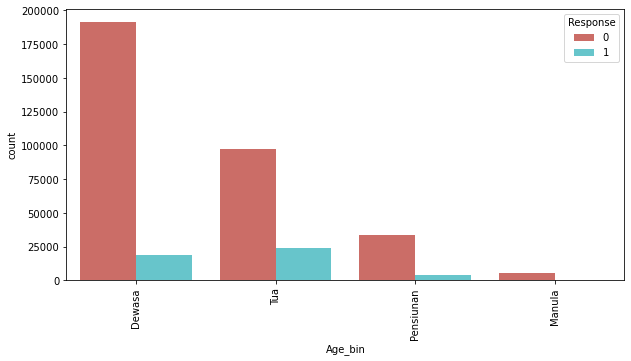

In [156]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x=train['Age_bin'], hue=train['Response'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)
## dapat dilihat untuk kolom interested, terbukti golongan TUA, lebih tertarik
## golongan dewasa justru tidak tertariknya mendominasi

In [157]:
(((train[["Gender","Response"]].groupby(["Gender"])).mean())*100).sort_values(by=["Response"],ascending=False).head()
## dapat dilihat gender 0(Male), cenderung memiliki kesadaran untuk memperoleh asuransi kendaraan

,Response
Gender,
0,13.841107
1,10.390241


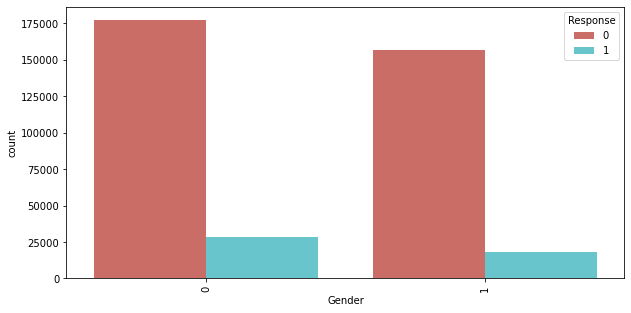

In [158]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x=train['Gender'], hue=train['Response'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)
## Male memang lebih cenderung untuk tertarik

In [159]:
(((train[["Driving_License","Response"]].groupby(["Driving_License"])).mean())*100).sort_values(by=["Response"],ascending=False).head()
## orang yang sudah memiliki surat ijin mengemudi cenderung untuk mengasuransikan kendaraan mereka

,Response
Driving_License,
1,12.271724
0,5.049261


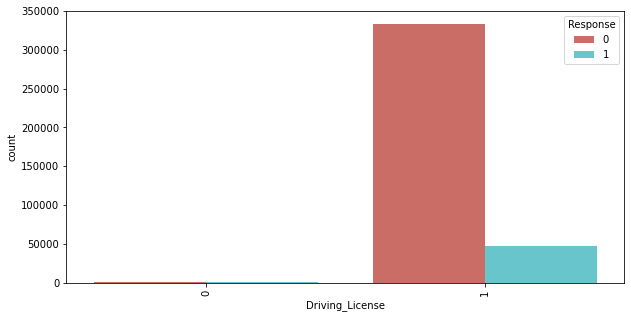

In [160]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x=train['Driving_License'], hue=train['Response'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)
## sesuai tabel diatas, yang sudah memiliki license memang cenderung interested
## yang tidak punya license, sangatlah kecil/sedikit, bahkan barplotnya hampir tidak kelihatan
## walaupun yang tidak tertarik lebih banyak, jadi kalau untuk yg tertarik, yg punya license lebih banyak daripada yang tidak

In [161]:
(((train[["Previously_Insured","Response"]].groupby("Previously_Insured")).mean())*100).sort_values(by=["Response"],ascending=False).head()
## orang yang sudah memiliki asuransi kendaraan sebelumnya, cenderung lebih tinggi kesadarannya untuk melakukan asuransi lagi

,Response
Previously_Insured,
0,22.545416
1,0.090478


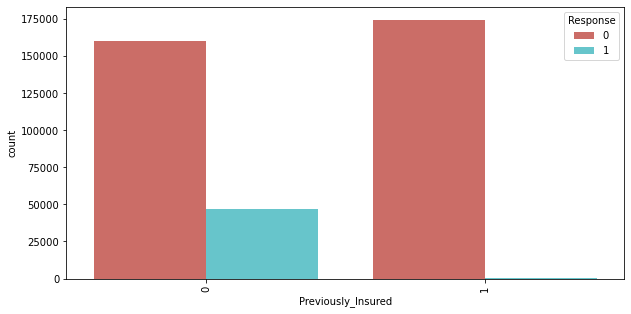

In [162]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x=train['Previously_Insured'], hue=train['Response'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)
## jumlah tidak tertarik memang sangat mendominasi, namun apabila dilihat yang tertariknya, yang sebelumnya belum
## memiliki insurance, cenderung akan lebih tertarik

In [163]:
(((train[["Vehicle_Damage","Response"]].groupby(["Vehicle_Damage"])).mean())*100).sort_values(by=["Response"],ascending=False).head()
# yang kendaraannya sudah pernah terkena damage, cenderung lebih aware akan asuansi kendaraan

,Response
Vehicle_Damage,
1,23.765546
0,0.520414


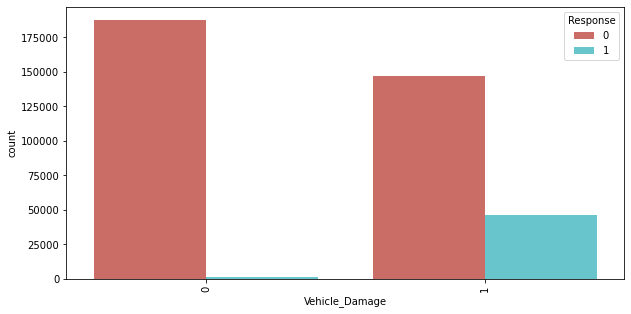

In [164]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x=train["Vehicle_Damage"], hue=train['Response'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)
## yang memiliki kendaraan yang sebelumnya pernah kena damage, terlihat memang lebih cenderung akan tertarik

In [165]:
(((train[["Vehicle_Age","Response"]].groupby(["Vehicle_Age"])).mean())*100).sort_values(by=["Response"],ascending=False).head()
## orang yang umur kendaraannya diatas 2 tahun, cenderung akan mengasuransikan kendaraanya

,Response
Vehicle_Age,
2,29.374649
1,17.375547
0,4.370517


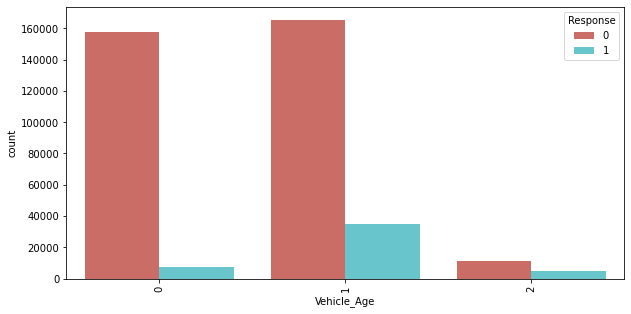

In [166]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x=train["Vehicle_Age"], hue=train['Response'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)
## walaupun dari grafik lebih besar kelas 1
## secaraa angka terbukti lebih tinggi kelas 2
## karena jumlah kelas 1 memang jauh lebih banyak daripada kelas 2

In [167]:
(((train[["Region_Code","Response"]].groupby(["Region_Code"])).mean())*100).sort_values(by=["Response"],ascending=False).head()
## penduduk wilayah dengan code 38 cenderung lebih aware akan asuransi kendaraan

,Response
Region_Code,
38.0,19.200395
28.0,18.716346
19.0,16.286645
4.0,15.824542
23.0,15.306122


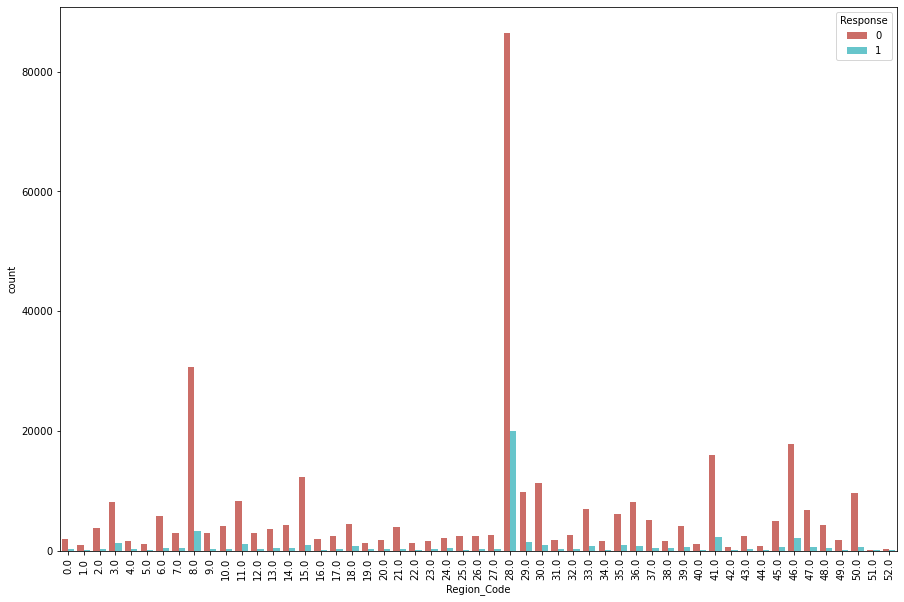

In [168]:
plt.figure(figsize=(15,10))
fig = sns.countplot(x=train["Region_Code"], hue=train['Response'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)
## region dengan jumlah tertarik terbanyak adalah 28, namun bisa dilihat bahwa tidak tertariknya juga sangat banyak
## sehingga dapat disimpulkan, memang penduduknya sangat banyak, kemudian apabila dalam presentase
## bisa dilihat 28 masih di bawah 38, walaupun ternyata kalau dilihat diplot 28 mendominasi
## tapi segi presentase ketertarikan, 38 menunjukan angka yaang lebih tinggi.

In [169]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_bin
id,,,,,,,,,,,,
1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1,Tua
2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0,Manula
3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1,Tua
4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0,Dewasa
5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0,Dewasa


# EVALUATION MATRIX 

In [4]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,recall_score,precision_score,accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

## HANDLING IMBALANCE DATA

### RANDOM OVER SAMPLING

In [5]:
(train['Response'].value_counts()/len(train)*100).round(2)

0    87.74
1    12.26
Name: Response, dtype: float64

In [6]:
interested = train[train["Response"] == 1]
not_interested = train[train["Response"]== 0] 

In [7]:
interested_oversample = resample(interested, ## kelas minority
                           replace = True,
                           n_samples = len(not_interested), ## jumlah dari kelas majority
                           random_state = 42)

In [8]:
df_new = pd.concat([not_interested,interested_oversample])

In [9]:
(df_new['Response'].value_counts()/len(df_new)*100).round(2)

1    50.0
0    50.0
Name: Response, dtype: float64

In [177]:
df_new

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_bin
id,,,,,,,,,,,,
2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0,Manula
4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0,Dewasa
5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0,Dewasa
6,1,24,1,33.0,0,0,1,2630.0,160.0,176,0,Dewasa
7,0,23,1,11.0,0,0,1,23367.0,152.0,249,0,Dewasa
...,...,...,...,...,...,...,...,...,...,...,...,...
13833,0,49,1,32.0,0,1,1,28868.0,124.0,105,1,Tua
373124,1,57,1,3.0,0,2,1,28179.0,124.0,171,1,Tua
100841,0,44,1,28.0,0,1,1,48654.0,26.0,256,1,Tua


In [11]:
x= df_new.drop(columns=["Response","Age_bin"])
y= df_new["Response"]

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.80,stratify=y,random_state=42)

# KNN 

In [38]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [39]:
y_KNN_train = model_KNN.predict(x_train)
y_KNN_test = model_KNN.predict(x_test)

In [40]:
accuracy_KNN_train = accuracy_score(y_train,y_KNN_train)
precision_KNN_train = precision_score(y_train,y_KNN_train)
recall_KNN_train = recall_score(y_train,y_KNN_train)
f1_KNN_train = f1_score(y_train,y_KNN_train)

accuracy_KNN_test = accuracy_score(y_test,y_KNN_test)
precision_KNN_test = precision_score(y_test,y_KNN_test)
recall_KNN_test = recall_score(y_test,y_KNN_test)
f1_KNN_test = f1_score(y_test,y_KNN_test)

In [41]:
print("EVALUATION MATRIX KNN :")
print("Accuracy = ",accuracy_KNN_train," VS ",accuracy_KNN_test)
print("Precision = ",precision_KNN_train," VS ",precision_KNN_test)
print("Recall = ",recall_KNN_train," VS ",recall_KNN_test)
print("F1_Score = ",f1_KNN_train," VS ",f1_KNN_test)

EVALUATION MATRIX KNN :
Accuracy =  0.8756611679918062  VS  0.8192135167464115
Precision =  0.806054921260442  VS  0.7483828183172003
Recall =  0.989376455504095  VS  0.9617972488038278
F1_Score =  0.888356716117339  VS  0.841773974036851


In [43]:
cm_KNN = confusion_matrix(y_test,y_KNN_test,labels=[1,0])
df_cm_KNN = pd.DataFrame(data=cm_KNN,columns=["Pred_1","Pred_0"],index=["Aktual_1","Aktual_0"])
df_cm_KNN

,Pred_1,Pred_0
Aktual_1,64325,2555
Aktual_0,21627,45253


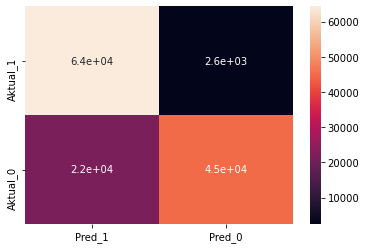

In [44]:
sns.heatmap(df_cm_KNN,annot=True)

# DECISION TREE

In [45]:
DT = DecisionTreeClassifier()

In [46]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
y_DT_train = DT.predict(x_train)
y_DT_test = DT.predict(x_test)

In [48]:
accuracy_DT_train = accuracy_score(y_train,y_DT_train)
precision_DT_train= precision_score(y_train,y_DT_train)
recall_DT_train = recall_score(y_train,y_DT_train)
f1_DT_train = f1_score(y_train,y_DT_train)

accuracy_DT_test = accuracy_score(y_test,y_DT_test)
precision_DT_test= precision_score(y_test,y_DT_test)
recall_DT_test = recall_score(y_test,y_DT_test)
f1_DT_test = f1_score(y_test,y_DT_test)

In [49]:
print("EVALUATION MATRIX DECISION TREE :")
print("Accuracy = ",accuracy_DT_train," VS ",accuracy_DT_test)
print("Precision = ",precision_DT_train," VS ",precision_DT_test)
print("Recall = ",recall_DT_train," VS ",recall_DT_test)
print("F1_Score = ",f1_DT_train," VS ",f1_DT_test)

EVALUATION MATRIX KNN :
Accuracy =  0.9999233699288649  VS  0.9440938995215311
Precision =  0.9998504997047369  VS  0.9006826214823409
Recall =  0.9999962619477495  VS  0.9982655502392345
F1_Score =  0.9999233755141783  VS  0.9469667957391884


In [50]:
cm_DT = confusion_matrix(y_test,y_DT_test,labels=[1,0])
df_cm_DT = pd.DataFrame(data=cm_DT,columns=["Pred_1","Pred_0"],index=["Aktual_1","Aktual_0"])
df_cm_DT

,Pred_1,Pred_0
Aktual_1,66764,116
Aktual_0,7362,59518


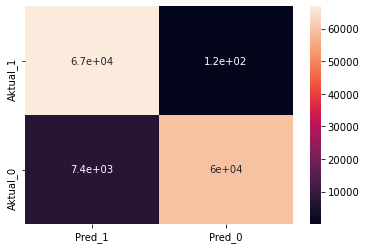

In [52]:
sns.heatmap(df_cm_DT,annot=True)

# RANDOM FOREST

In [53]:
RF = RandomForestClassifier()

In [54]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
y_RF_train = RF.predict(x_train)
y_RF_test = RF.predict(x_test)

In [56]:
accuracy_RF_train = accuracy_score(y_train,y_RF_train)
precision_RF_train= precision_score(y_train,y_RF_train)
recall_RF_train = recall_score(y_train,y_RF_train)
f1_RF_train = f1_score(y_train,y_RF_train)

accuracy_RF_test = accuracy_score(y_test,y_RF_test)
precision_RF_test= precision_score(y_test,y_RF_test)
recall_RF_test = recall_score(y_test,y_RF_test)
f1_RF_test = f1_score(y_test,y_RF_test)

In [57]:
print("EVALUATION MATRIX RANDOM CLASSIFIER :")
print("Accuracy = ",accuracy_RF_train," VS ",accuracy_RF_test)
print("Precision = ",precision_RF_train," VS ",precision_RF_test)
print("Recall = ",recall_RF_train," VS ",recall_RF_test)
print("F1_Score = ",f1_RF_train," VS ",f1_RF_test)

EVALUATION MATRIX RANDOM CLASSIFIER :
Accuracy =  0.9999233699288649  VS  0.9494841507177033
Precision =  0.9998467633428016  VS  0.9099090500020454
Recall =  1.0  VS  0.9977571770334929
F1_Score =  0.9999233758005828  VS  0.951810408153077


In [58]:
cm_RF = confusion_matrix(y_test,y_RF_test,labels=[1,0])
df_cm_RF = pd.DataFrame(data=cm_RF,columns=["Pred_1","Pred_0"],index=["Aktual_1","Aktual_0"])
df_cm_RF

,Pred_1,Pred_0
Aktual_1,66730,150
Aktual_0,6607,60273


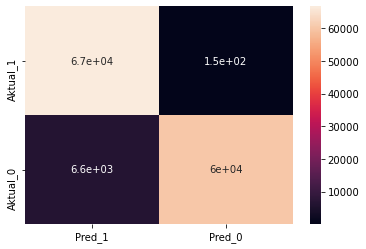

In [60]:
sns.heatmap(df_cm_RF,annot=True)

# ----------- HYPER PARAMETER TUNING ----------------

# KNN TUNED

In [61]:
KNN_Tuned = KNeighborsClassifier()

In [62]:
parameter_KNN = {
    "n_neighbors" : [5,15],
    "weights" : ["uniform","distance"], ## bobot. uniform ==> semua sama, distance==> setiap jarak bobot beda
    "p" : [1,2] ## buat method perhitungan jarak, bisa liat di shift+tab , 1 itu apa, 2 itu apa
}

In [63]:
model_KNN = GridSearchCV(estimator=KNN_Tuned,
                         param_grid = parameter_KNN,
                         n_jobs = -1, ## jumlah pred yang akan di pake, -1 berarti pake semua
                         cv = 5,
                         verbose = 1 ## menunjukan apa yang sedang di run, karena banyak
                         #scoring = "precision"
                        )

In [64]:
model_KNN.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 10.9min finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 15], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [65]:
model_KNN.best_estimator_

KNeighborsClassifier(p=1, weights='distance')

In [66]:
KNN_Tuned = model_KNN.best_estimator_

In [67]:
y_tuned_KNN_train = KNN_Tuned.predict(x_train)
y_tuned_KNN_test = KNN_Tuned.predict(x_test)

In [68]:
accuracy_tuned_KNN_train  = accuracy_score(y_train,y_tuned_KNN_train)
precision_tuned_KNN_train = precision_score(y_train,y_tuned_KNN_train)
recall_tuned_KNN_train  = recall_score(y_train,y_tuned_KNN_train)
f1_tuned_KNN_train = f1_score(y_train,y_tuned_KNN_train)

accuracy_tuned_KNN_test  = accuracy_score(y_test,y_tuned_KNN_test )
precision_tuned_KNN_test = precision_score(y_test,y_tuned_KNN_test )
recall_tuned_KNN_test  = recall_score(y_test,y_tuned_KNN_test )
f1_tuned_KNN_test  = f1_score(y_test,y_tuned_KNN_test )

In [71]:
print("EVALUATION MATRIX KNN TUNED :")
print("Accuracy = ",accuracy_tuned_KNN_train," VS ",accuracy_tuned_KNN_test)
print("Precision = ",precision_tuned_KNN_train," VS ",precision_tuned_KNN_test)
print("Recall = ",recall_tuned_KNN_train," VS ",recall_tuned_KNN_test)
print("F1_Score = ",f1_tuned_KNN_train," VS ",f1_tuned_KNN_test)

EVALUATION MATRIX KNN TUNED :
Accuracy =  0.9999233699288649  VS  0.8509943181818181
Precision =  0.9998504997047369  VS  0.7711338777301655
Recall =  0.9999962619477495  VS  0.9982655502392345
F1_Score =  0.9999233755141783  VS  0.87012166116031


In [72]:
cm_tuned_KNN = confusion_matrix(y_test,y_tuned_KNN_test,labels=[1,0])
df_cm_tuned_KNN = pd.DataFrame(data=cm_tuned_KNN,columns=["Pred_1","Pred_0"],index=["Aktual_1","Aktual_0"])
df_cm_tuned_KNN

,Pred_1,Pred_0
Aktual_1,66764,116
Aktual_0,19815,47065


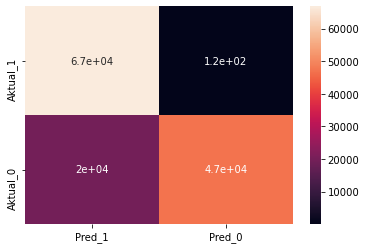

In [73]:
sns.heatmap(df_cm_tuned_KNN,annot=True)

# DECISION TREE TUNED

In [74]:
DT_tuned = DecisionTreeClassifier()

In [75]:
parameter_DT = {
    "max_depth" : [None,5], ## parameter default WAJIB IKUT!, none default ==> makanya pake
    "min_samples_split" : [2,9],
    "min_samples_leaf" : [1,2],
    "max_features" : [None,.8]
}

In [76]:
model_DT = GridSearchCV(estimator = DT_tuned,
                       param_grid= parameter_DT,
                       cv = 3,
                       n_jobs = -1,
                       verbose=1)

In [77]:
model_DT.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   27.0s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5], 'max_features': [None, 0.8],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 9]},
             verbose=1)

In [78]:
model_DT.best_estimator_

DecisionTreeClassifier(max_features=0.8)

In [79]:
DT_tuned = model_DT.best_estimator_

In [80]:
y_tuned_DT_train = DT_tuned.predict(x_train)
y_tuned_DT_test = DT_tuned.predict(x_test)

In [81]:
accuracy_tuned_DT_train  = accuracy_score(y_train,y_tuned_DT_train)
precision_tuned_DT_train = precision_score(y_train,y_tuned_DT_train)
recall_tuned_DT_train  = recall_score(y_train,y_tuned_DT_train )
f1_tuned_DT_train  = f1_score(y_train,y_tuned_DT_train )

accuracy_tuned_DT_test  = accuracy_score(y_test,y_tuned_DT_test )
precision_tuned_DT_test = precision_score(y_test,y_tuned_DT_test )
recall_tuned_DT_test  = recall_score(y_test,y_tuned_DT_test )
f1_tuned_DT_test  = f1_score(y_test,y_tuned_DT_test )

In [82]:
print("EVALUATION MATRIX DECISION TREE TUNED :")
print("Accuracy = ",accuracy_tuned_DT_train," VS ",accuracy_tuned_DT_test)
print("Precision = ",precision_tuned_DT_train," VS ",precision_tuned_DT_test)
print("Recall = ",recall_tuned_DT_train," VS ",recall_tuned_DT_test)
print("F1_Score = ",f1_tuned_DT_train," VS ",f1_tuned_DT_test)

EVALUATION MATRIX DECISION TREE TUNED :
Accuracy =  0.9999233699288649  VS  0.9447517942583732
Precision =  0.9998504997047369  VS  0.9020789964584065
Recall =  0.9999962619477495  VS  0.997816985645933
F1_Score =  0.9999233755141783  VS  0.9475358162120717


In [83]:
cm_tuned_DT = confusion_matrix(y_test,y_tuned_DT_test,labels=[1,0])
df_cm_tuned_DT= pd.DataFrame(data=cm_tuned_DT,columns=["Pred_1","Pred_0"],index=["Aktual_1","Aktual_0"])
df_cm_tuned_DT

,Pred_1,Pred_0
Aktual_1,66734,146
Aktual_0,7244,59636


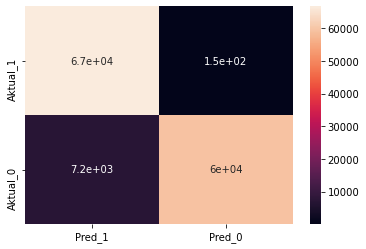

In [84]:
sns.heatmap(df_cm_tuned_DT,annot=True)

## Random Forest TUNED

In [85]:
RF_tuned = RandomForestClassifier()

In [86]:
parameter_RF ={
    "n_estimators" : [100,200],
    "max_depth" : [None,5], ## parameter default WAJIB IKUT!, none default ==> makanya pake
    "min_samples_split" : [2,9],
    "min_samples_leaf" : [1,2],
    "max_features" : [None,.8]
}

In [87]:
model_RF = GridSearchCV(estimator = RF_tuned,
                       param_grid= parameter_RF,
                       cv = 3,
                       n_jobs = -1,
                       verbose=1)

In [88]:
model_RF.fit(x_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 52.9min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 92.8min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5], 'max_features': [None, 0.8],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 9],
                         'n_estimators': [100, 200]},
             verbose=1)

In [89]:
model_RF.best_estimator_

RandomForestClassifier(max_features=0.8)

In [90]:
RF_tuned = model_RF.best_estimator_

In [91]:
y_tuned_RF_train = RF_tuned.predict(x_train)
y_tuned_RF_test = RF_tuned.predict(x_test)

In [92]:
accuracy_tuned_RF_train  = accuracy_score(y_train,y_tuned_RF_train)
precision_tuned_RF_train = precision_score(y_train,y_tuned_RF_train)
recall_tuned_RF_train  = recall_score(y_train,y_tuned_RF_train )
f1_tuned_RF_train  = f1_score(y_train,y_tuned_RF_train )

accuracy_tuned_RF_test  = accuracy_score(y_test,y_tuned_RF_test )
precision_tuned_RF_test = precision_score(y_test,y_tuned_RF_test )
recall_tuned_RF_test  = recall_score(y_test,y_tuned_RF_test )
f1_tuned_RF_test  = f1_score(y_test,y_tuned_RF_test )

In [93]:
print("EVALUATION MATRIX DECISION TREE TUNED :")
print("Accuracy = ",accuracy_tuned_RF_train," VS ",accuracy_tuned_RF_test)
print("Precision = ",precision_tuned_RF_train," VS ",precision_tuned_RF_test)
print("Recall = ",recall_tuned_RF_train," VS ",recall_tuned_RF_test)
print("F1_Score = ",f1_tuned_RF_train," VS ",f1_tuned_RF_test)

EVALUATION MATRIX DECISION TREE TUNED :
Accuracy =  0.9999215009027396  VS  0.9501869019138756
Precision =  0.9998467627700807  VS  0.9109870459602233
Recall =  0.9999962619477495  VS  0.9978767942583732
F1_Score =  0.9999215067709755  VS  0.9524543488964528


In [95]:
cm_tuned_RF = confusion_matrix(y_test,y_tuned_RF_test,labels=[1,0])
df_cm_tuned_RF= pd.DataFrame(data=cm_tuned_RF,columns=["Pred_1","Pred_0"],index=["Aktual_1","Aktual_0"])
df_cm_tuned_RF

,Pred_1,Pred_0
Aktual_1,66738,142
Aktual_0,6521,60359


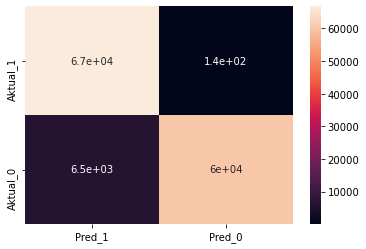

In [96]:
sns.heatmap(df_cm_tuned_RF,annot=True)

In [99]:
data= {
    "KNN" : [accuracy_KNN_test,precision_KNN_test,recall_KNN_test,f1_KNN_test],
    "Decision_Tree" : [accuracy_DT_test,precision_DT_test,recall_DT_test,f1_DT_test],
    "Random_Forest" : [accuracy_RF_test,precision_RF_test,recall_RF_test,f1_RF_test],
    "KNN_Tuned" : [accuracy_tuned_KNN_test,precision_tuned_KNN_test,recall_tuned_KNN_test,f1_tuned_KNN_test],
    "Decision_Tree_Tuned" : [accuracy_tuned_DT_test,precision_tuned_DT_test,recall_tuned_DT_test,f1_tuned_DT_test],
    "Random_Forest_Tuned" : [accuracy_tuned_RF_test,precision_tuned_RF_test,recall_tuned_RF_test,f1_tuned_RF_test]
}
pd.DataFrame(data=data, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

,KNN,Decision_Tree,Random_Forest,KNN_Tuned,Decision_Tree_Tuned,Random_Forest_Tuned
Accuracy,0.819214,0.944094,0.949484,0.850994,0.944752,0.950187
Precision,0.748383,0.900683,0.909909,0.771134,0.902079,0.910987
Recall,0.961797,0.998266,0.997757,0.998266,0.997817,0.997877
F1 Score,0.841774,0.946967,0.951810,0.870122,0.947536,0.952454


# -------- KESIMPULAN DAN SARAN ----

# KESIMPULAN 
## 1. Berikut beberapa feature yang setelah dilakukan EDA, terlihat memiliki pengaruh pada keputusan akhir calon pemegang polis asuransi kendaraan, apakah mereka tertarik atau tidak :
        - Usia, usahakan mencari yang berusia dengan rentang 20-40, karena rentang umur tersebut diatas kertas, berdasarkan data, memiliki kecenderungan 19.58% untuk tertarik mengasuransikan kendaraan mereka.
        - Gender, Male lebih sadar akan kepentingan asurasansi kendaraan, dan cenderung akan tertarik, dengan angka 13.48%
        - Driving_License, mereka yang sudah memiliki surat ijin mengemudi, cenderung akan tertarik untuk mengasuransikan kendaraan mereka, dengan kemungkinan 12.27%
        - Previously_insured, yang sebelumnya sudah memiliki asuransi, cenderung akan mengasuransikan kendaraan mereka lagi, dengan kemungkinan 22.55%
        - Vehicle_Damage, Mereka yang kendaraannya sudah pernah terkena damage, cenderung lebih tertarik untuk melakukan asuransi pada kendaraan mereka dengan kemungkinan 23.77%
        - Vehicle_Age, Mereke yang umur kendaraannya diatas 2 tahun, lebih tertarik untuk melakukan asuransi pada kendaraan mereka, dibanding yang kendaraannya berusia dibawah 2 tahun. Kemungkinan mereka akan melakukan asuransi pada kendaraannya adalah 29.3%
        - Region, beberapa wilayah yang memiliki presentase tinggi untuk melakukan asuransi pada kendaraan adalah wilayah dengan code : 38, 28, 19, 4, dan 23 dengan presentase 15-19%.
## 2. Recall akan menjadi patokan, karena yang ingin dikurangi adalah orang yang ternyata tertarik, tapi di prediksi tidak tertarik. Secara tidak langsung, bisa saja kehilangan 1 pelanggan, karena dia sebenarnya tertarik, tapi karena mesin memprediksi dia tidak tertarik, jadi tidak ditawarkan dengan gencar. Berikut model yang bisa menjadi opsi :
        - Random forest tuned(parameter seeperti pekerjaan diatas) menghasilkan nilai precision 0.997, walaupun sebenarnya masih overfit, tapi ini hasil terbaik. Kenapa tidak KNN tuned, karena pada model tersebut gap data train dan test nya, dengan kata lain model lebih overfit.
        - Opsi lainnya ada : Decision tree tuned(parameter seeperti pekerjaan diatas) dan Random forest default.

# SARAN 
## 1.  Target yang sempurna untuk ditawarkan asuransi kendaraan :
        - Orang berusia kisaran 20-40 tahun
        - Berjenis kelamin laki-laki, perempuan juga sebenarnuya tidak masalah, perbedaan presentase ketertarikan terhadap asuransi kendaraannya tidak begitu jauh, namun memang laki-laki cenderung lebih tinggi.
        - Orang yang sudah memiliki surat ijin mengemudi.
        - Orang yang sebelumnya sudah pernah mengasuransikan kendaraan mereka.
        - Orang yang sebelumnya kendaraannya sudah pernah terkena damage.
        - Orang yang umur dari kendaraannya diatas 2 tahun.
        - Lebih direkomendasikan orang dengan region : 38, 28, 19, 4, dan 23
## 2. Untuk model yang lebih signifikan dan tidak overfitting/underfitting :
        - Lakukan feature engineering yang lebih banyak, mungkin feature selection atau feature scaling.
        - Mungkin train size bisa diperbesar, agar model belajar lebih banyak, sehingga tidak overfitting.
        - lakukah hyper parameter tuning, lebih banyak fitsnya, lebih dimainin parameternya agar bisa membuat model menjadi model yang bagus ==> TIDAK OVERFITTING

# APLIKASI MODEL TERBAIK : RANDOM FOREST TUNED

In [179]:
test["Gender"] = test["Gender"].map({
    "Male" : 0,
    "Female" : 1
})

test["Vehicle_Damage"] = test["Vehicle_Damage"].map({
    "Yes" : 1,
    "No" : 0
})

test["Vehicle_Age"] = test["Vehicle_Age"].map({
    "> 2 Years" : 2,
    "1-2 Year" : 1,
    "< 1 Year" :0
})

In [180]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
381110,0,25,1,11.0,1,0,0,35786.0,152.0,53
381111,0,40,1,28.0,0,1,1,33762.0,7.0,111
381112,0,47,1,28.0,0,1,1,40050.0,124.0,199
381113,0,24,1,27.0,1,0,1,37356.0,152.0,187
381114,0,27,1,28.0,1,0,0,59097.0,152.0,297


In [181]:
y_pred = RF_tuned.predict(test)

In [184]:
test["Response"] = y_pred

In [185]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,y,Response
id,,,,,,,,,,,,
381110,0,25,1,11.0,1,0,0,35786.0,152.0,53,0,0
381111,0,40,1,28.0,0,1,1,33762.0,7.0,111,1,1
381112,0,47,1,28.0,0,1,1,40050.0,124.0,199,0,0
381113,0,24,1,27.0,1,0,1,37356.0,152.0,187,0,0
381114,0,27,1,28.0,1,0,0,59097.0,152.0,297,0,0
